# 1. Implementing logistic regression (2 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$.

1.1
$$ \frac{\exp(o_y + c)}{\sum_{y'} \exp(o_{y'} + c)} = \frac{\exp(c)\exp(o_y)}{\exp(c)\sum_{y'} \exp(o_{y'})} = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1.2
$$p(y = 1 | o_{-1} = 0, o_1 = 0) = \frac{\exp(o_1)}{\exp(o_1) + \exp(o_{-1})} = \frac{\exp(o)}{\exp(o) + \exp(0)} = \frac{\exp(-o)}{\exp(-o)}\frac{\exp(o)}{\exp(o) + 1} = \frac{1}{1 + \exp(-o)}$$

1.3
$$p(y = -1 | o) = 1 - p(y = 1 | o) = 1 - \frac{1}{1 + \exp(-o)} = 1 - \frac{\exp(o)}{\exp(o)}\frac{1}{1 + \exp(-o)} = 1 - \frac{\exp(o)}{\exp(o) + 1} = \frac{1}{1 + \exp(o)}$$

$$p(y | o) = \frac{1}{1 + \exp(-y \cdot o)}$$

$$-\log p(y | o) = \log(1 + \exp(-y \cdot o))$$

1.4

$$\lim_{o \rightarrow \infty} \log(1 + \exp(-o)) = \log(1 + \lim_{o \rightarrow \infty} \exp(-o)) = \log(1) = 0$$

$$\lim_{o \rightarrow -\infty} \log(1 + \exp(-o)) = \log(1 + \lim_{o \rightarrow \infty} \exp(o)) = \infty$$

# 2. Implementing the logistic loss (1.5 points)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in numpy.
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. In a new plot, plot its derivative with respect to $o$ for $y \in \{-1, 1\}$ and for $o \in [-5, 5]$ without using any automatic differentiation software (e.g. Pytorch, TensorFlow, JAX, etc.).
1. In a new plot, plot $l(y,o)$ with $y = 1$ and $o ∈ [-1000, 1000]$. What happens for large positive and large negative values of $o$? Why?

<ipython-input-1-4169d01acfe6>:8: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-y * o))


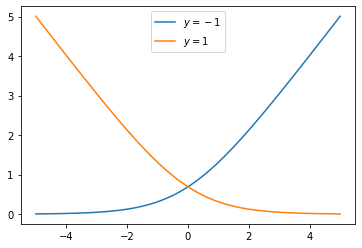

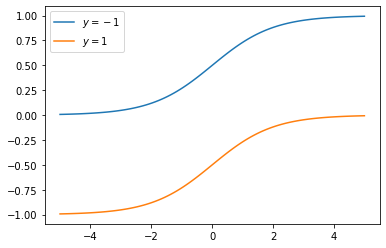

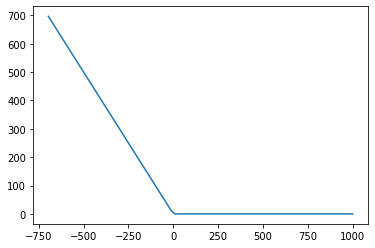

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

o = np.linspace(-5, 5, 100)

def bll(y, o):
    return np.log(1 + np.exp(-y * o))

fig, ax = plt.subplots()
for y in [-1, 1]:
    ax.plot(o, bll(y, o), label=f"$y = {y}$")
ax.legend()

def dbll(y, o):
    """
    f = np.log(g)
    df/dg = 1/g = 1/(1 + exp(-y * o))
    g = 1 + h
    dg/dh = 1
    h = exp(i)
    dh/di = exp(i) = exp(-y * o)
    i = -y*o
    di/do = -y
    df/do = df/dg dg/dh dh/di di/do
    """
    return -y * np.exp(-y * o) / (1 + np.exp(-y * o))

fig, ax = plt.subplots()
for y in [-1, 1]:
    ax.plot(o, dbll(y, o), label=f"$y = {y}$")
ax.legend()

o = np.linspace(-1000, 1000, 100)
fig, ax = plt.subplots()
ax.plot(o, bll(1, o))
# np.exp(x) overflows for large values of x. When o is large and negative,
# np.exp(-y*o) = np.exp(-o) results in an overflow, producing an inf.

# 3. Implementing logistic regression (1.5 points)

Implement a basic logistic regression model which is fit to the data from the new `generate_data` function (below) using gradient descent.
Your model should take the form `o = m*x + b`, where `o` is the output (logits), `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
Train the model using the logistic loss function you derived in the previous problem.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
Print out or plot the loss over the course of training.
You should be able to get a loss that is close to zero by the end of training - make sure you achieve this and **explain why**.

In [ ]:
import numpy as np

def generate_data():
    size = 1000
    rng = np.random.default_rng(seed=0)
    y = 2*rng.integers(0, 2, size) - 1
    x = rng.standard_normal((1000,)) + 4*y
    return x, y

Text(0, 0.5, 'Loss')

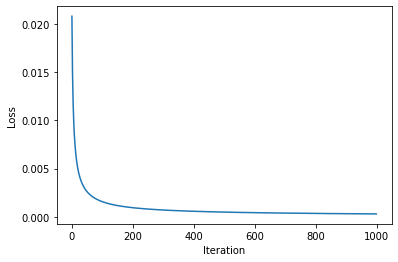

In [ ]:
weight = 1.
bias = 0.
def model(inputs):
    return weight * inputs + bias
def loss(inputs, targets):
    return np.mean(bll(targets, model(inputs)))
def dloss_dmodel(inputs, targets):
    return dbll(targets, model(inputs))
def weight_update(inputs, targets):
    return np.mean(inputs*dloss_dmodel(inputs, targets))
def bias_update(inputs, targets):
    return np.mean(dloss_dmodel(inputs, targets))

learning_rate = 1.

losses = []
inputs, targets = generate_data()
for _ in range(1000):
    new_weight = weight - learning_rate*weight_update(inputs, targets)
    new_bias = bias - learning_rate*bias_update(inputs, targets)
    weight = new_weight
    bias = new_bias
    losses.append(loss(inputs, targets))

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
# The data is linearly separable, so a loss of zero should be possible.